# <b>Clase 8: Proyecto.</b>

Un concesionario de autos vende autos nuevos, autos usados y además posee un servicio técnico que proporciona algunos servicios. Las reglas del negocio son las siguientes:
<ul>
<li> Un vendedor puede vender muchos autos, pero un auto es vendido sólo por un vendedor.</li>
<li> Un cliente puede comprar muchos autos pero cada auto es comprado sólo por un cliente.</li>
<li> Un vendedor genera una única factura por cada auto que vende.</li>
<li> Cualquier persona puede llevar su auto al servicio técnico del concesionario y aunque no haya comprado un auto será registrado como cliente.</li>
<li> Cada visita al servicio técnico genera un ticket de servicio.</li>
<li> Un auto puede ser atendido por muchos mecánicos y a su vez cada mecánico puede trabajar en varios autos.</li>
</ul>

Plantee un MER, que permita responder al menos los siguientes requerimientos: <br>

1. Cuáles son los mecánicos que han realizado la mayor cantidad de trabajos durante el último año?.
2. Cuás es el servicio que el concesionario realiza de manera más frecuente?
3. Cuál es el top 3 de los vendedores de autos?
4. Para un cliente determinado, cual es el detalle (auto, tipo de servicio, mecánicos, valor, etc.) de los servicios realizados sobre su(s) vehículo(s)?

# <b>(1) Diseñe el modelo ER.</b>

Inserte aquí la figura

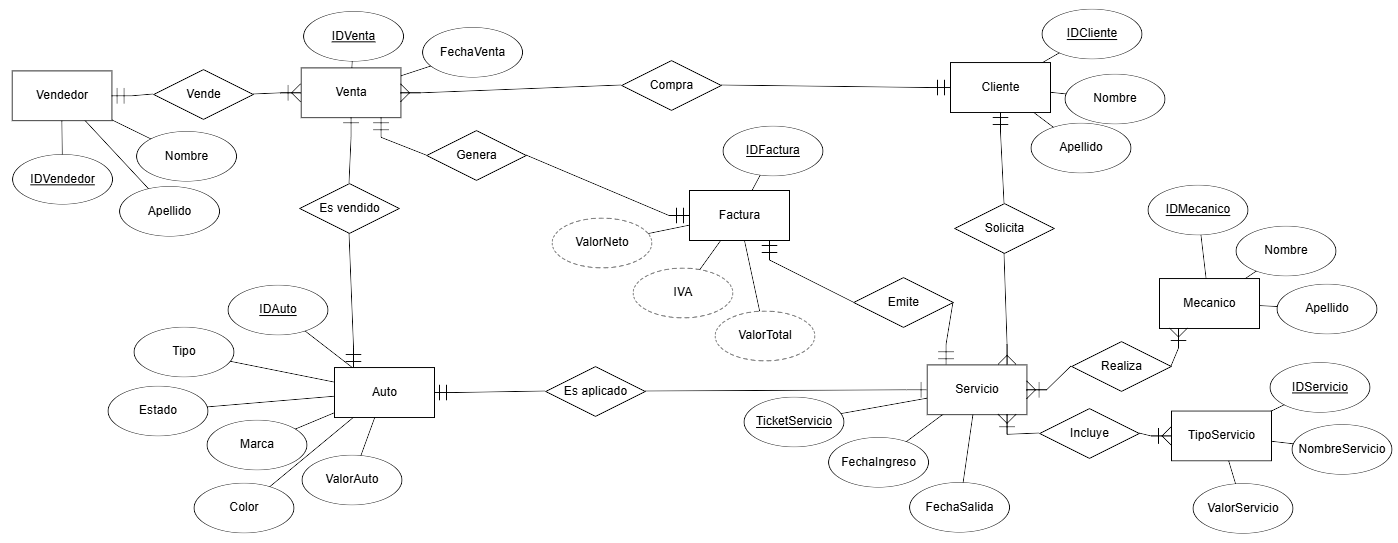

# <b> (2) Genere el modelo relacional correspondiente.</b>
Inserte aquí el script para la creación de tablas.

Se importan los modulos necesarios para trabajar: `sqlite3` y `pandas`

In [2]:
import sqlite3
import pandas as pd

Se crean la conexión a la base sde datos y el cursor

In [3]:
connection = sqlite3.connect("capstone.db")

In [4]:
cursor = connection.cursor()

Se crean las tablas y se incorpotan a la base de datos

In [5]:
cursor.execute("DROP TABLE IF EXISTS Cliente")
cursor.execute("DROP TABLE IF EXISTS Factura")
cursor.execute("DROP TABLE IF EXISTS Mecanico")
cursor.execute("DROP TABLE IF EXISTS Servicio")
cursor.execute("DROP TABLE IF EXISTS Vendedor")
cursor.execute("DROP TABLE IF EXISTS TipoServicio")
cursor.execute("DROP TABLE IF EXISTS Realiza")
cursor.execute("DROP TABLE IF EXISTS Incluye")
cursor.execute("DROP TABLE IF EXISTS Auto")
cursor.execute("DROP TABLE IF EXISTS Venta")

cursor.execute("""
              CREATE TABLE Cliente
              (
                IDCliente VARCHAR(15) NOT NULL,
                Nombre VARCHAR(20) NOT NULL,
                Apellido VARCHAR(20) NOT NULL,
                PRIMARY KEY (IDCliente)
              );
              """)

cursor.execute("""
              CREATE TABLE Auto
              (
                IDAuto INT NOT NULL,
                Tipo VARCHAR(20) NOT NULL,
                Estado VARCHAR(20) NOT NULL,
                ValorAuto INT NOT NULL,
                Marca VARCHAR(20) NOT NULL,
                Color VARCHAR(20) NOT NULL,
                PRIMARY KEY (IDAuto)
              );
              """)

cursor.execute("""
              CREATE TABLE Factura
              (
                IDFactura INT NOT NULL,
                PRIMARY KEY (IDFactura)
              );
              """)

cursor.execute("""
              CREATE TABLE Mecanico
              (
                IDMecanico VARCHAR(15) NOT NULL,
                Nombre VARCHAR(20) NOT NULL,
                Apellido VARCHAR(20) NOT NULL,
                PRIMARY KEY (IDMecanico)
              );
              """)

cursor.execute("""
              CREATE TABLE Servicio
              (
                TicketServicio INT NOT NULL,
                FechaIngreso DATE NOT NULL,
                FechaSalida DATE NOT NULL,
                IDAuto INT NOT NULL,
                IDCliente VARCHAR(15) NOT NULL,
                IDFactura INT NOT NULL,
                PRIMARY KEY (TicketServicio),
                FOREIGN KEY (IDAuto) REFERENCES Auto(IDAuto),
                FOREIGN KEY (IDCliente) REFERENCES Cliente(IDCliente),
                FOREIGN KEY (IDFactura) REFERENCES Factura(IDFactura)
              );
              """)

cursor.execute("""
              CREATE TABLE Vendedor
              (
                IDVendedor VARCHAR(15) NOT NULL,
                Nombre VARCHAR(20) NOT NULL,
                Apellido VARCHAR(20) NOT NULL,
                PRIMARY KEY (IDVendedor)
              );
              """)

cursor.execute("""
              CREATE TABLE TipoServicio
              (
                IDServicio INT NOT NULL,
                NombreServicio VARCHAR(25) NOT NULL,
                ValorServicio INT NOT NULL,
                PRIMARY KEY (IDServicio)
              );
              """)

cursor.execute("""
              CREATE TABLE Realiza
              (
                TicketServicio INT NOT NULL,
                IDMecanico VARCHAR(15) NOT NULL,
                PRIMARY KEY (TicketServicio, IDMecanico),
                FOREIGN KEY (TicketServicio) REFERENCES Servicio(TicketServicio),
                FOREIGN KEY (IDMecanico) REFERENCES Mecanico(IDMecanico)
              );
              """)

cursor.execute("""
              CREATE TABLE Incluye
              (
                IDServicio INT NOT NULL,
                TicketServicio INT NOT NULL,
                PRIMARY KEY (IDServicio, TicketServicio),
                FOREIGN KEY (IDServicio) REFERENCES TipoServicio(IDServicio),
                FOREIGN KEY (TicketServicio) REFERENCES Servicio(TicketServicio)
              );
              """)

cursor.execute("""
              CREATE TABLE Venta
              (
                FechaVenta DATE NOT NULL,
                IDVenta INT NOT NULL,
                IDCliente VARCHAR(15) NOT NULL,
                IDAuto INT NOT NULL,
                IDFactura INT NOT NULL,
                IDVendedor VARCHAR(15) NOT NULL,
                PRIMARY KEY (IDVenta),
                FOREIGN KEY (IDCliente) REFERENCES Cliente(IDCliente),
                FOREIGN KEY (IDAuto) REFERENCES Auto(IDAuto),
                FOREIGN KEY (IDFactura) REFERENCES Factura(IDFactura),
                FOREIGN KEY (IDVendedor) REFERENCES Vendedor(IDVendedor)
              );
""")
connection.commit()

Se verifica que las tablas se hayan creado correctamente, considerando las KeyID, ForeignID, columnas y tipos de datos. Para ello se visualizan utilizando `PRAGMA`

In [6]:
tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';",connection)
print(f"Esta base de datos contiene {len(tablas)} tablas: {', '.join(tablas['name'].values)}")

Esta base de datos contiene 10 tablas: Cliente, Auto, Factura, Mecanico, Servicio, Vendedor, TipoServicio, Realiza, Incluye, Venta


In [7]:
for n in tablas["name"]:
  print("Nombre de Tabla: " + n)
  print("Columnas: ")
  display(pd.read_sql(f"PRAGMA table_info({n})",connection))
  print("\n")

Nombre de Tabla: Cliente
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDCliente,VARCHAR(15),1,None,1
1,1,Nombre,VARCHAR(20),1,None,0
2,2,Apellido,VARCHAR(20),1,None,0




Nombre de Tabla: Auto
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDAuto,INT,1,None,1
1,1,Tipo,VARCHAR(20),1,None,0
2,2,Estado,VARCHAR(20),1,None,0
3,3,ValorAuto,INT,1,None,0
4,4,Marca,VARCHAR(20),1,None,0
5,5,Color,VARCHAR(20),1,None,0




Nombre de Tabla: Factura
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDFactura,INT,1,None,1




Nombre de Tabla: Mecanico
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDMecanico,VARCHAR(15),1,None,1
1,1,Nombre,VARCHAR(20),1,None,0
2,2,Apellido,VARCHAR(20),1,None,0




Nombre de Tabla: Servicio
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,TicketServicio,INT,1,None,1
1,1,FechaIngreso,DATE,1,None,0
2,2,FechaSalida,DATE,1,None,0
3,3,IDAuto,INT,1,None,0
4,4,IDCliente,VARCHAR(15),1,None,0
5,5,IDFactura,INT,1,None,0




Nombre de Tabla: Vendedor
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDVendedor,VARCHAR(15),1,None,1
1,1,Nombre,VARCHAR(20),1,None,0
2,2,Apellido,VARCHAR(20),1,None,0




Nombre de Tabla: TipoServicio
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDServicio,INT,1,None,1
1,1,NombreServicio,VARCHAR(25),1,None,0
2,2,ValorServicio,INT,1,None,0




Nombre de Tabla: Realiza
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,TicketServicio,INT,1,None,1
1,1,IDMecanico,VARCHAR(15),1,None,2




Nombre de Tabla: Incluye
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDServicio,INT,1,None,1
1,1,TicketServicio,INT,1,None,2




Nombre de Tabla: Venta
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,FechaVenta,DATE,1,None,0
1,1,IDVenta,INT,1,None,1
2,2,IDCliente,VARCHAR(15),1,None,0
3,3,IDAuto,INT,1,None,0
4,4,IDFactura,INT,1,None,0
5,5,IDVendedor,VARCHAR(15),1,None,0


#<b>(3) Inserte registros en todas las tablas generadas.</b>
Para la generacion de registros considere el uso de <a href="http://www.generatedata.com">www.generatedata.com</a>.<br><br>
Inserte aquí el script para la inserción de registros.

Se rellenan las tablas creadas anteriormente con datos ficticios

In [8]:
cursor.execute("""
              INSERT INTO Mecanico (IDMecanico, Nombre, Apellido)
              VALUES
              ("22367825-4","Sigourney","Conley"),
              ("9211654-9","Vincent","Holt"),
              ("1135277-4","Haviva","Walls"),
              ("45489371-9","Randall","Duffy"),
              ("17216425-0","Ray","Mcclure"),
              ("18216426-0","Raul","Munoz"),
              ("19216427-0","Begoña","Urtubia");
""")

In [9]:
cursor.execute("""
              INSERT INTO Cliente (IDCliente, Nombre, Apellido)
              VALUES
              ("28393493-4","Evelyn","Reynolds"),
              ("1050366-3","Whitney","Estrada"),
              ("5604763-8","Daphne","Harrison"),
              ("33112717-5","Jordan","Pennington"),
              ("9209440-5","Susan","Coleman");
""")

In [10]:
cursor.execute("""
              INSERT INTO Vendedor (IDVendedor, Nombre, Apellido)
              VALUES
              ("30679488-4","Eagan","Hood"),
              ("5916803-7","Indira","Walsh"),
              ("18751321-9","Cullen","Foster"),
              ("1059228-3","Demetrius","Jarvis"),
              ("12628760-7","Caldwell","Bright");
""")

In [11]:
cursor.execute("""
              INSERT INTO TipoServicio (IDServicio, NombreServicio, ValorServicio)
              VALUES
              (1001, "Diagnóstico", 10000),
              (1002, "Pack mantenimiento preventivo", 50000),
              (1003, "Pack mantenimiento correctivo", 70000),
              (1004, "Cambio aceite", 25000),
              (1005, "Cambio filtro aire", 15000),
              (1006, "Cambio filtro combustible", 20000),
              (1007, "Cambio pastillas frenos", 40000),
              (1008, "Alineación", 30000),
              (1009, "Reparación sistema eléctrico", 60000),
              (1010, "Desabolladura", 80000),
              (1011, "Pintura", 120000),
              (1012, "Cambio neumáticos", 30000),
              (1013, "Limpieza Interna", 20000),
              (1014, "Limpieza externa", 15000);

""")

In [12]:
cursor.execute("""
              INSERT INTO Auto (IDAuto, Tipo, Estado, ValorAuto, Marca, Color)
              VALUES
              (3001, 'Sedán',     'Nuevo', 7000000, 'Toyota', 'Rojo'),
              (3002, 'SUV',       'Nuevo', 12000000, 'Hyundai', 'Negro'),
              (3003, 'Pickup',    'Usado', 15000000, 'Ford', 'Blanco'),
              (3004, 'Hatchback', 'Usado', 8500000, 'Mazda', 'Azul'),
              (3005, 'Sedán',     'Usado', 6500000, 'Nissan', 'Gris'),
              (3006, 'SUV',       'Nuevo', 18000000, 'BMW', 'Negro'),
              (3007, 'Pickup',    'Usado', 22000000, 'Chevrolet', 'Rojo'),
              (3008, 'Coupé',     'Nuevo', 12000000, 'Audi', 'Blanco'),
              (3009, 'Convertible', 'Nuevo', 25000000, 'Mercedes-Benz', 'Plateado'),
              (3010, 'Van',       'Usado', 10000000, 'Kia', 'Amarillo'),
              (3011, 'Camión',    'Usado', 35000000, 'Volvo', 'Blanco'),
              (3012, 'Motocicleta', 'Usado', 5000000, 'Honda', 'Negro'),
              (3013, 'SUV',       'Usado', 14000000, 'Jeep', 'Verde'),
              (3014, 'Sedán',      'Usado', 7500000, 'Suzuki', 'Rojo'),
              (3015, 'Pickup',    'Usado', 20000000, 'RAM', 'Negro'),
              (3016, 'Hatchback', 'Usado', 8000000, 'Peugeot', 'Azul'),
              (3017, 'SUV',       'Usado', 16000000, 'Toyota', 'Gris'),
              (3018, 'Convertible', 'Nuevo', 24000000, 'BMW', 'Blanco'),
              (3019, 'Van',   'Usado', 9500000, 'Hyundai', 'Negro'),
              (3020, 'Camión',  'Nuevo', 36000000, 'Scania', 'Rojo')

""")

In [13]:
cursor.execute("""
INSERT INTO Venta (FechaVenta, IDVenta, IDCliente, IDAuto, IDFactura, IDVendedor)
              VALUES
            ('2023-10-01', 4001, '28393493-4', 3001, 5001, '5916803-7'),
            ('2023-10-02', 4002, '1050366-3', 3002, 5002, '30679488-4')
""")

In [14]:
cursor.execute("""
INSERT INTO Servicio (TicketServicio, FechaIngreso, FechaSalida, IDCliente, IDFactura, IDAuto)
              VALUES
            (2001, '2023-10-04', '2023-10-14', '33112717-5', 5003, 3014),
            (2002, '2023-11-11', '2023-11-30', '5604763-8', 5004, 3009 ),
            (2003, '2023-12-22', '2024-02-12', '9209440-5', 5005, 3019 )
""")


In [15]:
cursor.execute("""
INSERT INTO Realiza (TicketServicio, IDMecanico)
              VALUES
            (2001, "22367825-4"),
            (2002, "22367825-4"),
            (2003, "22367825-4"),
            (2001, "9211654-9"),
            (2002, "9211654-9"),
            (2003, "1135277-4"),
            (2002, "45489371-9"),
            (2003, "17216425-0")

""")

In [16]:
cursor.execute("""
INSERT INTO Incluye (IDServicio, TicketServicio)
              VALUES
            (1001,2001),
            (1004,2001),
            (1007,2001),
            (1001,2002),
            (1009,2002),
            (1008,2002),
            (1001, 2003),
            (1013, 2003),
            (1014, 2003)
""")


In [17]:
cursor.execute("""
INSERT INTO Factura (IDFactura)
              VALUES
            (5001),
            (5002),
            (5003),
            (5004),
            (5005)

""")

In [18]:
connection.commit()

Una vez creada la tabla se responden las preguntas planteadas:
1. Cuáles son los mecánicos que han realizado la mayor cantidad de trabajos durante el último año?.


In [19]:
query = """
SELECT Mecanico.Nombre, Mecanico.Apellido, COUNT(*) AS CantidadServicios
FROM Mecanico
JOIN Realiza ON Mecanico.IDMecanico = Realiza.IDMecanico
JOIN Servicio ON Realiza.TicketServicio = Servicio.TicketServicio
GROUP BY Mecanico.IDMecanico
ORDER BY CantidadServicios DESC
LIMIT 3;

"""
df = pd.read_sql(query, connection)
df

,Nombre,Apellido,CantidadServicios
0,Sigourney,Conley,3
1,Vincent,Holt,2
2,Randall,Duffy,1


2. Cuál es el servicio que el concesionario realiza de manera más frecuente?


In [20]:
query = """
SELECT TipoServicio.NombreServicio, COUNT(*) AS CantidadServicios
FROM TipoServicio
JOIN Incluye ON TipoServicio.IDServicio = Incluye.IDServicio
JOIN Servicio ON Incluye.TicketServicio = Servicio.TicketServicio
GROUP BY TipoServicio.IDServicio
ORDER BY CantidadServicios DESC
LIMIT 1;
"""
df = pd.read_sql(query, connection)
df

,NombreServicio,CantidadServicios
0,Diagnóstico,3


3. Cuál es el top 3 de los vendedores de autos?


In [21]:
query = """
SELECT Vendedor.Nombre, Vendedor.Apellido, COUNT(*) AS CantidadVentas
FROM Vendedor
JOIN Venta ON Vendedor.IDVendedor = Venta.IDVendedor
GROUP BY Vendedor.IDVendedor
ORDER BY CantidadVentas DESC
LIMIT 3;
"""
df = pd.read_sql(query, connection)
df

,Nombre,Apellido,CantidadVentas
0,Indira,Walsh,1
1,Eagan,Hood,1


4. Para un cliente determinado, cual es el detalle (auto, tipo de servicio, mecánicos, valor, etc.) de los servicios realizados sobre su(s) vehículo(s)?

Veamos el caso para un cliente, cuyo **IDCliente es '9209440-5'**

Se usa una función llamada `GROUP_CONCAT` para agrupar en un registro los servicios individuales ejecutados, y los mecánicos que participaron en cada Ticket Servicio, y se calcula el Valor Total del Servicio como la suma de los individuales.

In [22]:
query = """
SELECT
    S.TicketServicio,
    C.IDCliente,
    C.Nombre || ' ' || C.Apellido AS NombreCliente,
    A.IDAuto,
    A.Marca,
    A.Tipo,
    A.Color,
    S.FechaIngreso,
    S.FechaSalida,

  -- Subconsulta para calcular el total del servicio
    (
        SELECT SUM(TS.ValorServicio)
        FROM Incluye I
        JOIN TipoServicio TS ON I.IDServicio = TS.IDServicio
        WHERE I.TicketServicio = S.TicketServicio
    ) AS ValorTotalServicio,

    -- Concatenar nombres y valor de los servicios
    (
        SELECT GROUP_CONCAT(DISTINCT TS.NombreServicio || ' ($' || TS.ValorServicio || ')')
        FROM Incluye I
        JOIN TipoServicio TS ON I.IDServicio = TS.IDServicio
        WHERE I.TicketServicio = S.TicketServicio
    ) AS ServiciosRealizados,

    -- Concatenar nombres de los mecánicos
    (
        SELECT GROUP_CONCAT(DISTINCT M.Nombre || ' ' || M.Apellido)
        FROM Realiza R
        JOIN Mecanico M ON R.IDMecanico = M.IDMecanico
        WHERE R.TicketServicio = S.TicketServicio
    ) AS Mecanicos

FROM Servicio S
JOIN Cliente C ON S.IDCliente = C.IDCliente
JOIN Auto A ON S.IDAuto = A.IDAuto
WHERE C.IDCliente = '9209440-5';
"""
df = pd.read_sql(query, connection)
df

,TicketServicio,IDCliente,NombreCliente,IDAuto,Marca,Tipo,Color,FechaIngreso,FechaSalida,ValorTotalServicio,ServiciosRealizados,Mecanicos
0,2003,9209440-5,Susan Coleman,3019,Hyundai,Van,Negro,2023-12-22,2024-02-12,45000,"Diagnóstico ($10000),Limpieza Interna ($20000)...","Haviva Walls,Ray Mcclure,Sigourney Conley"


# <b>A continuación escriba y ejecute consultas SQL que permitan satisfacer requerimientos específicos considerando las funciones/operadores propuestos a continuación:</b>

#<b>(4) Funciones de agregación, GROUP BY, HAVING</b>

a) **GROUP BY**: Esta consulta muestra cuál es el cliente que ha gastado más dinero en servicios realizados sobre sus vehículos.

In [24]:
# su código aquí

query = """
SELECT
    C.IDCliente,
    C.Nombre || ' ' || C.Apellido AS NombreCliente,
    SUM(TS.ValorServicio) AS TotalGastado
FROM Cliente C
INNER JOIN Servicio S ON C.IDCliente = S.IDCliente
INNER JOIN Incluye I ON S.TicketServicio = I.TicketServicio
INNER JOIN TipoServicio TS ON I.IDServicio = TS.IDServicio
GROUP BY C.IDCliente
ORDER BY TotalGastado DESC
LIMIT 1;
"""
df = pd.read_sql(query, connection)
df



,IDCliente,NombreCliente,TotalGastado
0,5604763-8,Daphne Harrison,100000


a) **HAVING**: Esta consulta muestra qué clientes acumulan más de $ 50.000 en servicios.

In [25]:
# su código aquí
# Pregunta: ¿Qué clientes acumulan más de 50.000 en servicios?

query = """
SELECT
    C.IDCliente,
    C.Nombre || ' ' || C.Apellido AS NombreCliente,
    SUM(TS.ValorServicio) AS TotalGastado
FROM Cliente C
INNER JOIN Servicio S ON C.IDCliente = S.IDCliente
INNER JOIN Incluye I ON S.TicketServicio = I.TicketServicio
INNER JOIN TipoServicio TS ON I.IDServicio = TS.IDServicio
GROUP BY C.IDCliente
HAVING SUM(TS.ValorServicio) > 50000
ORDER BY TotalGastado DESC;
"""
df = pd.read_sql(query, connection)
df



,IDCliente,NombreCliente,TotalGastado
0,5604763-8,Daphne Harrison,100000
1,33112717-5,Jordan Pennington,75000


#<b>(5) Joins (INNER, OUTER)</b>

a) **INNER JOIN**: Esta consulta muestra, mediante un INNER JOIN, los mecánicos que tienen tickets de servicio asociados (es decir, aquellos que han participado en algún servicio).

In [ ]:
query = """
        SELECT m.IDMecanico,m.Nombre, m.Apellido, r.TicketServicio
        FROM Mecanico m
        INNER JOIN Realiza r ON m.IDMecanico = r.IDMecanico;
        """
df = pd.read_sql(query, connection)
df

,IDMecanico,Nombre,Apellido,TicketServicio
0,22367825-4,Sigourney,Conley,2001
1,22367825-4,Sigourney,Conley,2002
2,22367825-4,Sigourney,Conley,2003
3,9211654-9,Vincent,Holt,2001
4,9211654-9,Vincent,Holt,2002
5,1135277-4,Haviva,Walls,2003
6,45489371-9,Randall,Duffy,2002
7,17216425-0,Ray,Mcclure,2003


b) **LEFT OUTER JOIN**: Con un LEFT JOIN se listan todos los mecánicos, mostrando además el ticket de servicio cuando existe. De esta forma se pueden identificar los mecánicos que aún no han participado en ningún servicio (aparecerá NULL en la columna TicketServicio).

In [ ]:
query = """
        SELECT m.IDMecanico, m.Nombre, m.Apellido, r.TicketServicio
        FROM Mecanico m
        LEFT JOIN Realiza r ON m.IDMecanico = r.IDMecanico;
        """
df = pd.read_sql(query, connection)
df

,IDMecanico,Nombre,Apellido,TicketServicio
0,22367825-4,Sigourney,Conley,2001.0
1,22367825-4,Sigourney,Conley,2002.0
2,22367825-4,Sigourney,Conley,2003.0
3,9211654-9,Vincent,Holt,2001.0
4,9211654-9,Vincent,Holt,2002.0
5,1135277-4,Haviva,Walls,2003.0
6,45489371-9,Randall,Duffy,2002.0
7,17216425-0,Ray,Mcclure,2003.0
8,18216426-0,Raul,Munoz,NaN
9,19216427-0,Begoña,Urtubia,NaN


#<b> (6) UNION, INTERSECT y EXCEPT</b>

a) **UNION**: Esta consulta une (sin duplicados) los identificadores de mecánicos y vendedores en una sola lista.

In [ ]:
query = """
        SELECT IDMecanico AS ID FROM Mecanico
        UNION
        SELECT IDVendedor AS ID FROM Vendedor;
        """
df = pd.read_sql(query, connection)
df

,ID
0,1059228-3
1,1135277-4
2,12628760-7
3,17216425-0
4,18216426-0
5,18751321-9
6,19216427-0
7,22367825-4
8,30679488-4
9,45489371-9


b) **INTERSECT**: Aquí se obtienen los identificadores de clientes que aparecen tanto en la tabla de ventas como en la de servicios (es decir, clientes que han comprado un auto y, además, han utilizado el servicio técnico).

In [ ]:
query = """
        SELECT IDCliente FROM Venta
        INTERSECT
        SELECT IDCliente FROM Servicio;
        """
df = pd.read_sql(query, connection)
df

,IDCliente


c) **EXCEPT**: Esta consulta muestra los clientes que aparecen en la tabla de ventas, pero no en la de servicios.

In [ ]:
query = """
        SELECT IDCliente FROM Venta
        EXCEPT
        SELECT IDCliente FROM Servicio;
        """
df = pd.read_sql(query, connection)
df

,IDCliente
0,1050366-3
1,28393493-4


#<b> (7) Consultas anidadas.</b>

a) **Servicios con valor superior al promedio**: Se listan los tipos de servicio cuyo valor es mayor que el valor promedio de todos los servicios, utilizando una subconsulta en la cláusula WHERE.

In [ ]:
query = """
        SELECT IDServicio, NombreServicio, ValorServicio
        FROM TipoServicio
        WHERE ValorServicio > (SELECT AVG(ValorServicio) FROM TipoServicio);
        """
df = pd.read_sql(query, connection)
df

,IDServicio,NombreServicio,ValorServicio
0,1002,Pack mantenimiento preventivo,50000
1,1003,Pack mantenimiento correctivo,70000
2,1009,Reparación sistema eléctrico,60000
3,1010,Desabolladura,80000
4,1011,Pintura,120000


b) **Vehículos vendidos a clientes que también han recibido servicio**: Se obtienen los detalles de los autos vendidos a clientes que han llevado su vehículo al servicio técnico.

In [ ]:
query = """
        SELECT *
        FROM Auto
        WHERE IDAuto IN (
            SELECT IDAuto
            FROM Venta
            WHERE IDCliente IN (
                SELECT IDCliente FROM Servicio
            )
        );
        """
df = pd.read_sql(query, connection)
df

##NO EXISTE NINGUNO EN BASE A LA DATA INSERTADA

,IDAuto,Tipo,Estado,ValorAuto,Marca,Color


# <b> (8) Triggers (Insert, Delete, Update)</b>

Para ejemplificar la aplicación de triggers, primero creamos una tabla de log para registrar operaciones sobre la tabla Venta.

**Creación de la tabla de log**

In [ ]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS LogVenta (
        LogID INTEGER PRIMARY KEY AUTOINCREMENT,
        Operacion TEXT,
        FechaOperacion DATETIME DEFAULT CURRENT_TIMESTAMP,
        IDVenta INT
    );
""")

a) **Trigger para INSERT**:
Este trigger se activa después de insertar una venta y registra la operación.

In [ ]:
cursor.execute("""
    CREATE TRIGGER AfterInsertVenta
    AFTER INSERT ON Venta
    BEGIN
        INSERT INTO LogVenta (Operacion, IDVenta)
        VALUES ('INSERT', NEW.IDVenta);
    END;
""")

b) **Trigger para DELETE**: Se activa tras eliminar un registro de la tabla Venta.

In [ ]:
cursor.execute("""
    CREATE TRIGGER AfterDeleteVenta
    AFTER DELETE ON Venta
    BEGIN
        INSERT INTO LogVenta (Operacion, IDVenta)
        VALUES ('DELETE', OLD.IDVenta);
    END;
""")

c) **Trigger para UPDATE**: Se activa tras actualizar un registro de la tabla Venta.

In [ ]:
cursor.execute("""
    CREATE TRIGGER AfterUpdateVenta
    AFTER UPDATE ON Venta
    BEGIN
        INSERT INTO LogVenta (Operacion, IDVenta)
        VALUES ('UPDATE', NEW.IDVenta);
    END;
""")

**DEMOSTRACION TRIGGER**

In [ ]:
#SE INSERTA VENTA
cursor.execute("""
INSERT INTO Venta (FechaVenta, IDVenta, IDCliente, IDAuto, IDFactura, IDVendedor)
VALUES ('2023-12-01', 4003, '5604763-8', 3003, 5006, '18751321-9');
""")
connection.commit()

**Verificacion de LOG hecho con triggers**

In [ ]:
# Verificar el log de la operación
df_log = pd.read_sql("SELECT * FROM LogVenta", connection)
df_log


,LogID,Operacion,FechaOperacion,IDVenta
0,1,INSERT,2025-04-01 19:30:06,4003


In [ ]:
# Cerrar conexión
connection.close()